In [ ]:
#import keras
#import tensorflow as tf
#from tensorflow.keras import layers


#from tensorflow import keras
#from tensorflow.keras import layers


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#import tensorflowjs as tfjs   #дохнет ядро

#from tensorflow import keras
#from tensorflow.python.keras import layers
#from tensorflow.python.keras.models import Sequential

#import tensorflow.contrib.eager as tfe #deprecated
#tf.enable_eager_execution()
from tensorflow.keras.layers import RNN
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

2024-03-16 16:09:28.408153: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
print(os.listdir('/Users/marina/Desktop/useful_tablez'))

['proceeds_xlsx1.csv', 'myData.xlsx', 'best cities for a workation.csv', 'Employee_long.csv', 'acre_Poligonos.qvd', 'owid-covid-data.xlsx', '.DS_Store', 'drinks_with_id.csv', 'Employee.csv', 'london_weather.csv', 'dict.csv', 'world_development_data_interpolated.csv', 'nuclear_explosions.csv', 'purchases_new.parquet', 'sample.dbf', 'Airline Dataset.csv', 'proceeds_all.xlsx', 'GlobalWeatherRepository.csv', 'dict_city_workation.csv', 'purchases_new.avro', 'EmployeesPositions.csv', 'Pivottt.xlsx', 'world-data-2023.csv', 'myData.csv', 'world-data-2023.xlsx', 'proceeds_all.xls', 'diabetes.csv', 'test my name.xlsx', 'dict_countries.csv', 'test_VizelKoobControl.xlsx', 'diabet_predict_checkpoint.data-00000-of-00001', 'Position.csv', 'Employee.xlsx', '1.png', 'proceeds_xlsx1.xlsx']


In [28]:
data = pd.read_csv('/Users/marina/Desktop/useful_tablez/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome'>

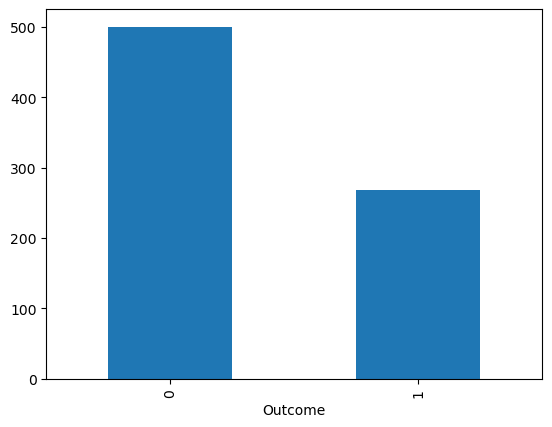

In [31]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks as cf
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

data['Outcome'].value_counts().plot(kind='bar')

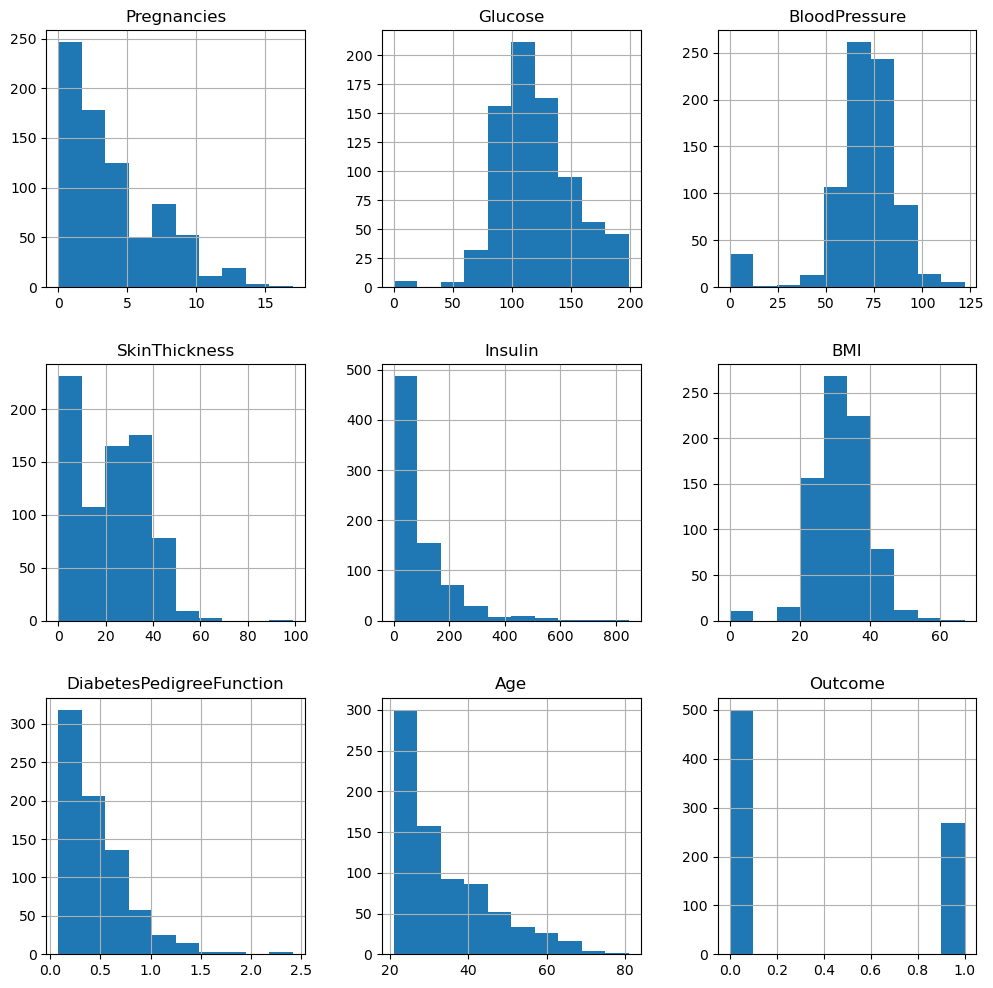

In [32]:
data.hist(figsize=(12,12));

In [33]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] 
Y = data['Outcome']

print(X.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
#######TF

In [34]:
data.values.astype(float)[4]

#features = np.array(X) # взяла с доки
#features

array([  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
        33.   ,   1.   ])

In [35]:
#my_model = tf.keras.Sequential([     #взяла с доки
#  layers.Dense(64),
#  layers.Dense(1)
#])

#my_model.compile(loss = tf.losses.MeanSquaredError(),
#                      optimizer = tf.optimizers.Adam())

In [36]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0]]  # sets field types
    parsed_line = tf.io.decode_csv(line, example_defaults)
    #print(parsed_line)
    
    # First 8 fields are features, combine into single tensor
    features = tf.reshape(parsed_line[:-1], shape=(8,))
    # Last field is the label
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label
#print('parsing...')
train_dataset = tf.data.TextLineDataset('/Users/marina/Desktop/useful_tablez/diabetes.csv')


train_dataset = train_dataset.skip(1)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=200)  # randomize
train_dataset = train_dataset.batch(140)


#features, label = tf.data.Iterator().next()   # это депрекатед

#iterator = tf.compat.v1.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
#features, label = iterator.get_next()
#iter = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
#next_element = iter.get_next()
#features, label = next_element

# View a single example entry from a batch
iterator = tf.compat.v1.data.make_one_shot_iterator(train_dataset) 
features, label = iterator.get_next()                              



print("example features:", features[31])

example features: tf.Tensor([  1.    105.     58.      0.      0.     24.3     0.187  21.   ], shape=(8,), dtype=float32)


In [37]:
print("example label:", label[31])

example label: tf.Tensor(0, shape=(), dtype=int32)


In [51]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(8,)),  # input shape required
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1)
])

#new_model = keras.models.model_from_json(json_config)
print('Model creation')

Model creation


In [52]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_categorical_crossentropy(y, y_, from_logits=True)

#def grad(model, inputs, targets):
#    with tf.GradientTape() as tape:
#        loss_value = loss(model, inputs, targets)

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
#    return tape.gradient(loss_value, model.variables) if loss_value is not None else [tf.zeros_like(var) for var in model.variables]
    return tape.gradient(loss_value, model.trainable_variables)

#разобрать этот ретурн


In [56]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(features, label, epochs=150, batch_size=10)


Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6585 - loss: 5.5044
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 5.3001 
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6119 - loss: 6.2555
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - loss: 5.8383 
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 6.2595
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6167 - loss: 6.1780 
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6682 - loss: 5.3479 
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5539 - loss: 7.1908  
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6020 - loss: 6.4154 
Epoch 10/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 6.4819 
Epoch 11/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6278 - loss: 5.9988 
Epoch 12/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 6.3670 
Epoch 136/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6217 - loss: 6.0977 
Epoch 137/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - loss: 5.2752 
Epoch 138/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 5.4648 
Epoch 139/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 5.4641 
Epoch 140/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 5.6130 
Epoch 141/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 6.3183 
Epoch 142/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 5.6040 
Epoch 143/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 6.7635 
Epoch 144/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 5.9686 
Epoch 145/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - loss: 5.3549 
Epoch 146/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [41]:
Eta ne nada

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.metrics.Mean()
    epoch_accuracy = tf.metrics.Accuracy()

      # Training loop - using batches
        
    for x, y in train_dataset:
        # Optimize the model
        grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.variables))
#        optimizer.apply_gradients(zip(grad, model.trainable_variables),skip_gradients_aggregation=True)
#        optimizer.apply_gradients(zip(grads, model.variables),
#                                  global_step=tf.compat.v1.train.get_or_create_global_step)

       
        # Track progress
        epoch_loss_avg(loss(model, x, y))  # add current batch loss
        # compare predicted label to actual label
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

        # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))


2024-03-16 13:50:05.113845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:05.289656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 000: Loss: 57903.348, Accuracy: 61.282%


2024-03-16 13:50:05.489938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:05.678630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:05.846065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:06.030432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:06.297003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:06.449422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-16 13:50:06.618270: W tensorflow/core/framework/local_rendezvous.cc:404] L

KeyboardInterrupt: 

In [57]:
model.save('./keras_model.keras')
json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)

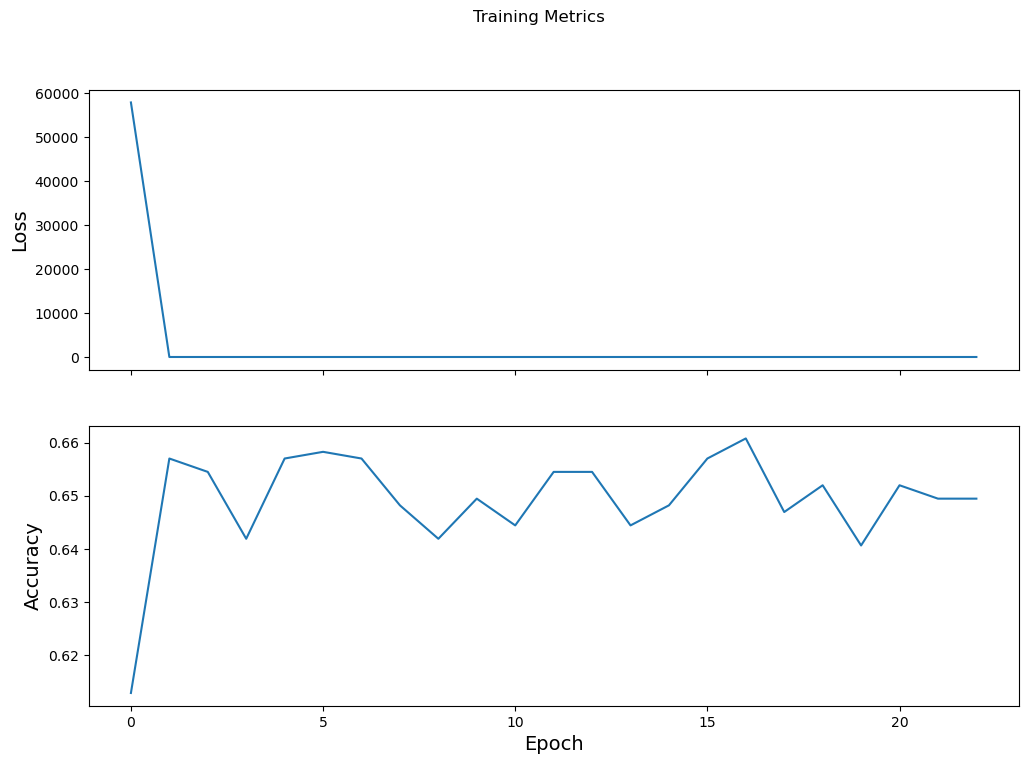

In [58]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

In [65]:
class_ids = ["No", "Yes"]

predict_dataset = tf.convert_to_tensor([
    [6.0   , 148.0   ,  72.0   ,  35.0   ,   0.0   ,  33.6  ,   0.627,    50.0   ,],
    [61.0   , 18.0   ,  10.0   ,  65.0   ,   0.0   ,  12.6  ,   0.927,    55.0   ,],
    [40.   , 110.0  ,  92.0   ,   0.0  ,   0.0  ,  37.6  ,   0.191, 30.0    ]
    
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))


Example 0 prediction: No
Example 1 prediction: No
Example 2 prediction: No


In [61]:
#model.save_weights('./checkpoints/diabet_predict_checkpoint')
#const saveResult = await model.save('./save_model/diabet_predict');
